# Cluster visualization

In [12]:
import urllib
import re
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

#import data online from HUGS server
def read_data(targ):
    ins = "wfc3-uvis-acs-wfc"
    filt = "multi"
    exteng = "1"

    url = "https://archive.stsci.edu/hlsps/hugs/ngc"+targ+"/hlsp_hugs_hst_"+ins+"_ngc"+targ+"_"+filt+"_v1_catalog-meth"+exteng+".txt"
    file = urllib.request.urlopen(url)
    
    ptr = 1
    hd = [] #header of the dataframe

    hd.append("Nan") #This is because there is a space in the beginning of each line in all data file.
    hd.append("X")  
    hd.append("Y")

# Make two files. One contains all data in single spaced form (f1) and other is the unedited file to take out headers(f2).
    with open(r"D:\IIT material\Krittika python project\NGC"+targ+" data.txt", 'w') as f1, open(r"D:\IIT material\Krittika python project\NGC"+targ+" header.txt", 'w') as f2:
        for line in file:
            line = line.decode("utf-8")
            f2.write(line)
            if ptr > 54: # This is where the real data starts.   
                f1.write(re.sub('[\t ]+',' ', line))  #remove extra spaces
            ptr += 1        

    with open(r"D:\IIT material\Krittika python project\NGC"+targ+" header.txt", 'r') as fr:
        lines = fr.readlines()

        for i in range(14, 50):
            hd.append(lines[i])



    file_path = r"D:\IIT material\Krittika python project\NGC"+targ+" data.txt"

    df = pd.read_csv(file_path, sep = ' ') #create dataframe

    df.columns = hd #put headers

    df.drop(['Nan'], inplace=True, axis=1) # 1st column just had empty space. So removed it.

    df.drop(df[df['# Col. 33: Membership Probability [-1.0: not available]\n'] < 90].index, inplace = True) #stars with more the 90 % probability
    df.drop(df[df['# Col.  3: F275W calibrated magnitude\n'] < 0].index, inplace = True) # positive magnitude
    df.drop(df[df['# Col.  9: F336W calibrated magnitude\n'] < 0].index, inplace = True) # positive magnitude
    df['Color index'] = df['# Col.  3: F275W calibrated magnitude\n'] - df['# Col.  9: F336W calibrated magnitude\n']
    return df

In [10]:
def visualize(targ):
    df = read_data(targ)
    
    font = {'family': 'serif', 
            'color':  'black',
            'weight': 'ultralight',
            'size': 20,
            } #font for plot editing.
    
    df.drop(df[df['# Col. 21: F606W calibrated magnitude\n'] < 0].index, inplace = True) # positive magnitude

    m = df['# Col. 21: F606W calibrated magnitude\n']

    #visible size of the stars
    factor = pow(10,6)
    area = pow(10, -0.4*m) * factor

    plt.figure(figsize = (15, 15))
    plt.scatter(df['# Cols. 34,35: Right ascension (J2000, epoch 2015.0) and \n'], df['#              Declination (J2000, epoch J2015.0) of the star, astrometrized using Gaia DR1 (Lindegren et al. 2016)  \n'], s = area ,color='white')
    ax = plt.gca()
    ax.set_facecolor('black')
    ax.set_xlabel("Right ascension", fontsize = 20, fontdict = font)
    ax.set_ylabel("Declination", fontsize = 20, fontdict = font)
    plt.show()

Enter the name of the required cluster: NGC2808


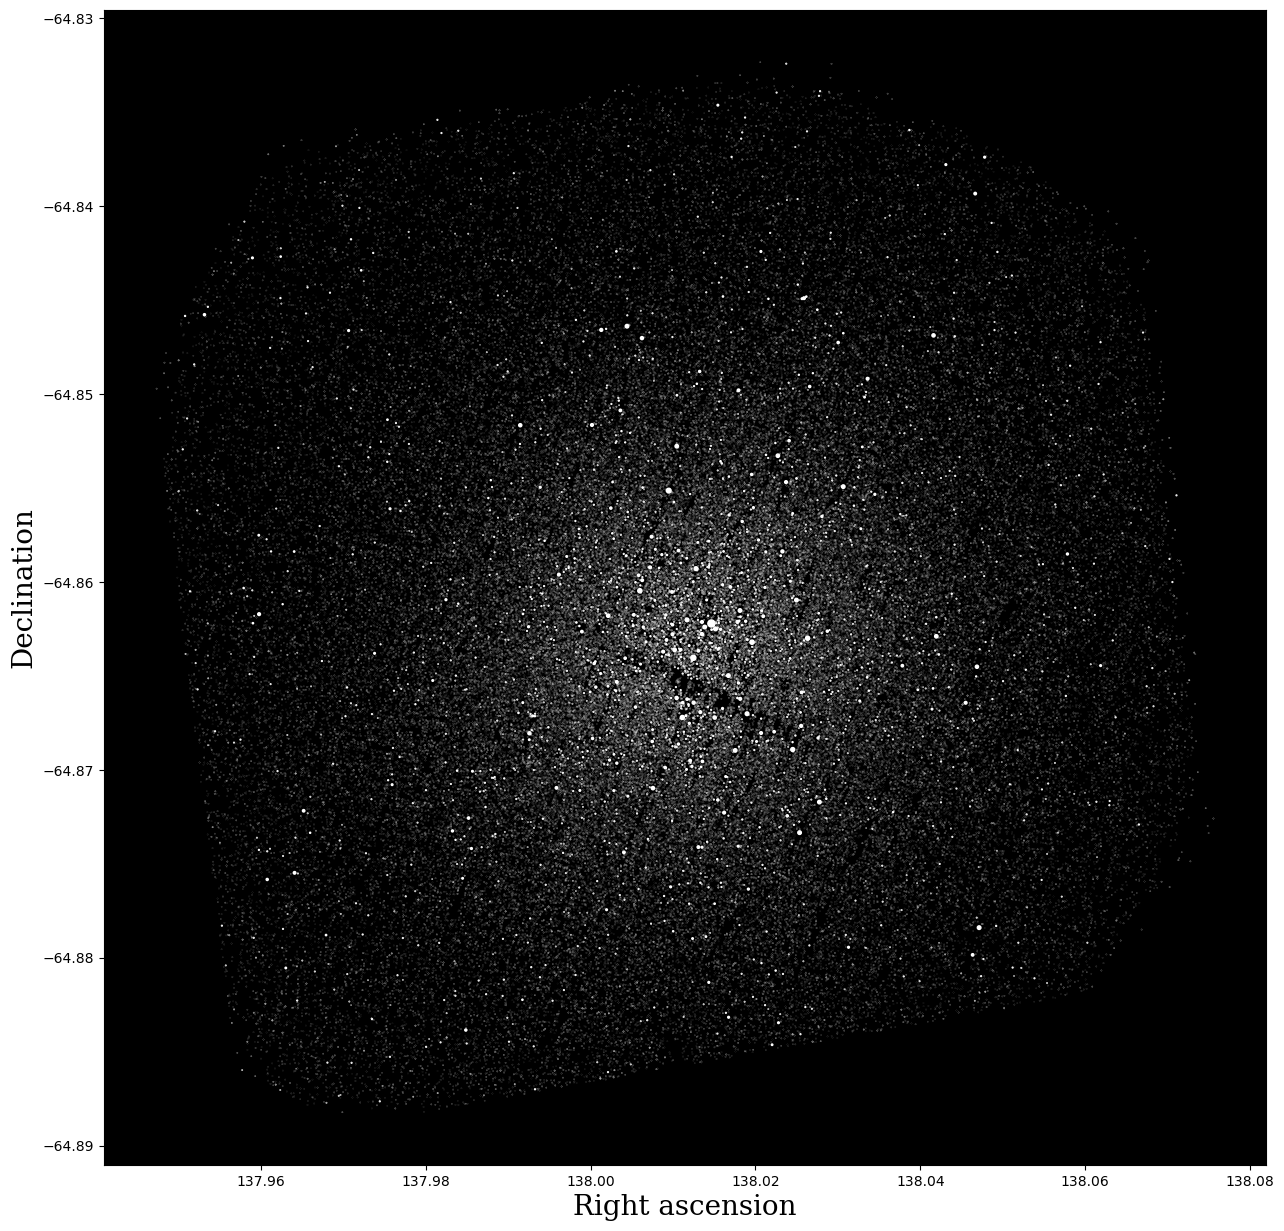

In [11]:
targ = input("Enter the name of the required cluster: NGC")    

visualize(targ)